# **Introducion to circuit topology**



Until now we have become quite comfortable with circuit defining in pennylane. Any circuit we want to build, we define a series of qubits and connect them through multi-qubit gates as we wish. This is not the case for real hardwares.

The most striking feature of the real devices are that not all connections between the qubits are allowed. Thus, a coded quantum circuit, when needs to be executed in a real device, some sort of preprocessing/ post-processing is needed.

We show one suc real device topology, where not all qubits are alloed to be connected via a CNOT gate. You cn assume the disallowed connections are due to no interaction between those pairs. So, we develop a trick to implement long range CNOT gates in the following crcuit topology.

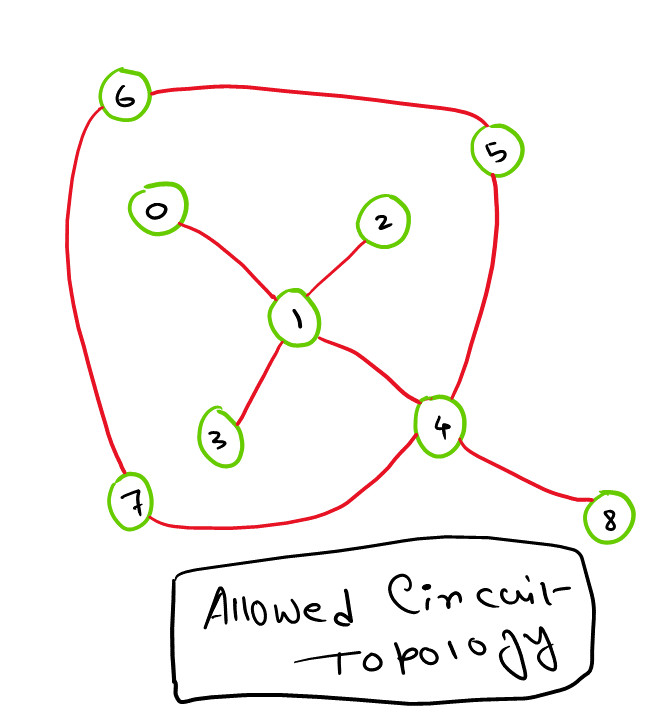

### SWAP gates

$$ \text{SWAP} \ket{x} \otimes \ket{y} = \ket{y} \otimes \ket{x}.$$

SWAP gate can be used to implement long range CNOT gates using short range allowed CNOT gates.

For example:

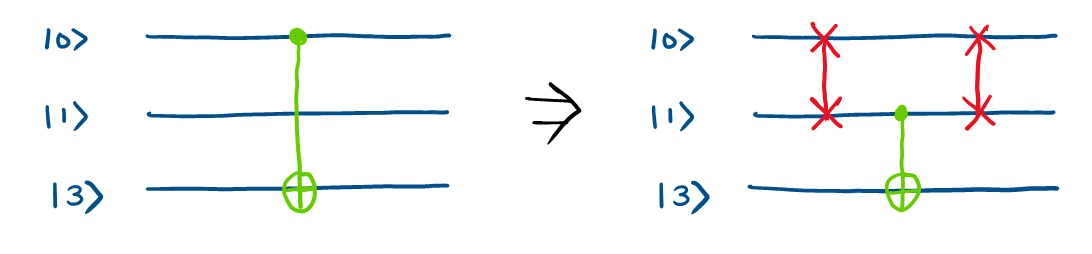

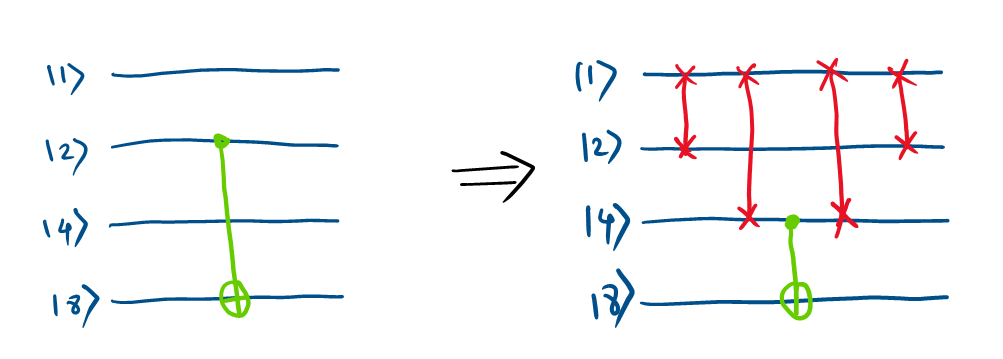

Problem: Find out the minimum number of SWAP gate required to construct any CNOT(a,b) gate.

In [1]:
import numpy as np
import pennylane as qml

In [2]:
topology = {
    0: [1],
    1: [0, 2, 3, 4],
    2: [1],
    3: [1],
    4: [1, 5, 7, 8],
    5: [4, 6],
    6: [5, 7],
    7: [4, 6],
    8: [4],
}

In [3]:
# Define the CNOT builder using SWAP gates.
def n_swaps(cnot):
    """Count the minimum number of swap gates needed to create the equivalent CNOT.

    Args:
        - cnot (qml.Operation): A CNOT gate that needs to be implemented on the hardware
        You can find out the wires on which an operator works by asking for the 'wires' attribute: 'cnot.wires'.

    Returns:
        - (int): minimum number of swap gates required.
    """

    # Your code goes here ->
    control_wire, target_wire = cnot.wires[0], cnot.wires[1]

    # Track the numbr of swaps:
    number_of_swaps = 0

    while target_wire not in topology[control_wire]:
        for i in topology[control_wire]:
            topology[control_wire] = topology[control_wire] + topology[i]

        # Added a swap gate to a neighbour:
        number_of_swaps += 1
    # Double the number to get back the original state representation:
    return number_of_swaps * 2

In [4]:
# Define the expected control and target wire/ qubit of the CNOT gate on the hardware:
con_tar = [2,8]

print(f"Minimum number of SWAPs required for CNOT({con_tar}) is: {n_swaps(qml.CNOT(wires=[int(wire) for wire in con_tar]))}")

Minimum number of SWAPs required for CNOT([2, 8]) is: 4
